# To complete this homework you just need to correctly finish 5 short functions
- [Implementation (Grayscale)](#Implementation-(Grayscale))
- [Implementation (Color)](#Implementation-(Color))
- [Many Feature Maps](#Many-Feature-Maps)
- [Padding](#Padding)
- [Stride](#Stride)
- [Max-pooling](#Max-pooling)

# If your [Summary Test](#Summary-Test) section runs without error, you have finished everything correctly!

# Optional resources:
Here is a list of a few links that __also__ explain/demo convolutions. You don't have to look at any of them, but if you get stuck they might help you out:

Explanation:
- http://cs231n.github.io/convolutional-networks/

Demos:
- http://cs231n.github.io/assets/conv-demo/index.html
- http://setosa.io/ev/image-kernels/

---

# Setup
First we will import our dependencies and load the convolution kernels you've seen in the lecture slides.

In [2]:
# We'll need "hw.py" to auto-reload for convenience
%load_ext autoreload
%autoreload 2

# Load the pre-defined convolution kernels
from kernels import *

# Grayscale
Now we will implement grayscale (single channel) convolutions.

First, we'll need a way to display, load, and save grayscale images.
The following functions do exactly that, as well as normalizing and de-normalizing the images for easier processing (although not entirely required for simple convolutions).

In [3]:
from utils import imshow_grayscale, imload_grayscale, imsave_grayscale

Check that an example image loads and displays correctly

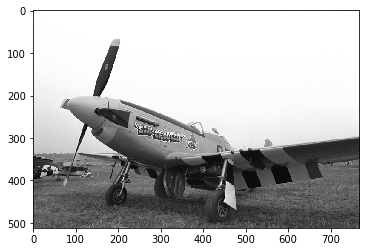

In [4]:
kodim20_grayscale = imload_grayscale('kodim20.png')
imshow_grayscale(kodim20_grayscale)

---
## Implementation (Grayscale)
Now you will implement single-channel 2D convolutions by filling out the skeleton code for `conv2d_grayscale` in "hw.py".

In [5]:
from hw import conv2d_grayscale
%aimport hw

---
## Sanity Check (Grayscale)

Make sure the size of the feature map makes sense for a 3x3 kernel:

In [6]:
test_grayscale_size = conv2d_grayscale(kodim20_grayscale, kernel_emboss)
assert test_grayscale_size.shape == (kodim20_grayscale.shape[0]-2, kodim20_grayscale.shape[1]-2)

and a 5x5 kernel:

In [7]:
test_grayscale_size = conv2d_grayscale(kodim20_grayscale, kernel_gauss5)
assert test_grayscale_size.shape == (kodim20_grayscale.shape[0]-4, kodim20_grayscale.shape[1]-4)

Make sure the convolution works with non-square kernels:

In [8]:
kernel_test_aspect = np.array([
    [-1.,  1.,  0., -1.,  1.],
    [ 1.,  0.,  0.,  0., -1.],
    [-1., -1.,  0.,  1.,  1.]
])
test_grayscale_aspect = conv2d_grayscale(kodim20_grayscale, kernel_test_aspect)
assert test_grayscale_aspect.shape == (kodim20_grayscale.shape[0]-2, kodim20_grayscale.shape[1]-4)

## Manual testing (Grayscale)
To further test your convolution implementation, try running it with some of the kernels defined at the top of this notebook. Compare with the images in the "out/" directory to see if you are getting the right results. Also feel free to `imload_grayscale` and use any of your own images! or define your own custom kernels.

Use `imshow_grayscale` to display the image. Note: Using matplotlib directly instead might lead to the colors being inaccurate.

## [See also: Pro tips](#Pro-Tips)

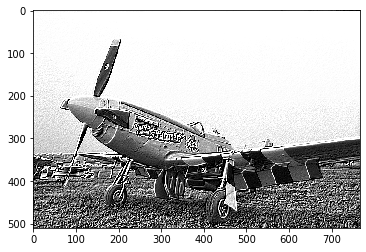

In [9]:
test_grayscale = conv2d_grayscale(kodim20_grayscale, kernel_emboss)
imshow_grayscale(test_grayscale)

__Reference image for kernel_emboss (the default example):__

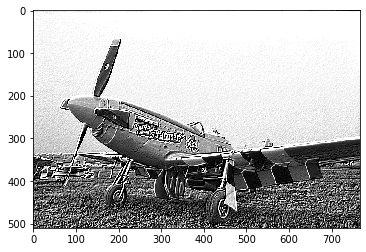

In [10]:
imshow_grayscale(imload_grayscale('out/emboss.png'))

`imshow_grayscale` only shows a small preview of the image.

You can use `imsave_grayscale` to save your output to a `.png` file
to see it in all its glory:

In [11]:
# imsave_grayscale(test_grayscale, 'conv_grayscale.png')

# Color
Now we will start working with color images (with three RGB channels).

First we need versions of `imshow_grayscale`, `imload_grayscale` and `imsave_grayscale` that can work with color data:

In [29]:
from utils import imshow, imload, imsave

Check that an example image loads and displays correctly:

The output image should be __in color__

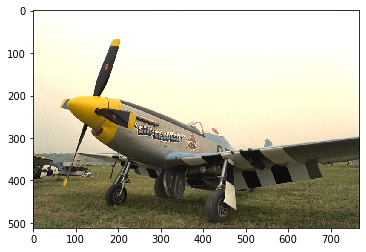

In [30]:
kodim20 = imload('kodim20.png')
imshow(kodim20)

---
## Implementation (Color)
Now you will implement multi-channel 2D convolutions by filling out the skeleton code for `conv2d` in "hw.py".

In [31]:
from hw import conv2d
%aimport hw

---
## Kernel Stacking
To use our single-channel kernels with multi-channel images, we can just stack them in the channel dimension.

We divide by the number of channels here so that the kernels don't end up making the image brighter or darker. The idea is that the total "energy" of the kernel (sum of all of its elements) must add up to 1.

In [32]:
def stack_kernel(ker, channels=3):
    return np.stack([ker] * channels, axis = 2) / channels

By the way, feel free to use different kernels at different channels. In fact, stacking the same kernel multiple times is almost never useful. Convolutional Neural Networks certainly don't do this.

In [33]:
# e.g.
stacked_combo = np.stack([kernel_gauss3, kernel_laplace, kernel_emboss], axis=2) / 3

## Sanity Check (Color)

Make sure the size of the feature map makes sense for a 3x3 kernel:

In [45]:
test_size = conv2d(kodim20, stacked_combo)
assert test_size.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2)

and a 5x5 kernel:

In [46]:
test_size = conv2d(kodim20, stack_kernel(kernel_gauss5))
assert test_size.shape == (kodim20.shape[0]-4, kodim20.shape[1]-4)

Make sure the convolution works with non-square kernels:

In [47]:
kernel_test_aspect = np.array([
    [-1.,  1.,  0., -1.,  1.],
    [ 1.,  0.,  0.,  0., -1.],
    [-1., -1.,  0.,  1.,  1.]
])
test_aspect = conv2d(kodim20, stack_kernel(kernel_test_aspect))
assert test_aspect.shape == (kodim20.shape[0]-2, kodim20.shape[1]-4)

## Manual testing (Color)
Now let's do some manual tests again.

Check "out/r_gauss3-g_laplace-b_emboss.png" for an example of using `stacked_combo` from above.

Somewhat counterintuitively, we still use `imshow_grayscale` to display the feature maps since the convolution still has only a single channel in its output.

You can use `stack_kernel` from above for your tests, define a mixed kernel like `stacked_combo` or even roll your own properly 3D kernel. For example, you could try to come up with the real 3D Gaussian blur kernel (it's not just the stacked version we were using above!)

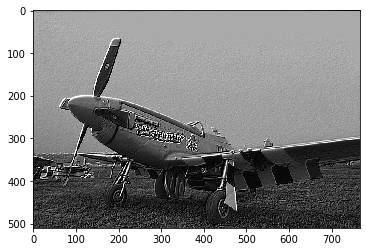

In [48]:
test = conv2d(kodim20, stacked_combo)
imshow_grayscale(test)

__Reference image for r_gauss3-g_laplace-b_emboss (the default example):__

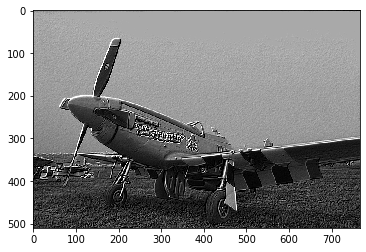

In [49]:
imshow_grayscale(imload_grayscale('out/r_gauss3-g_laplace-b_emboss.png'))

You can save the images like before:

In [50]:
# imsave_grayscale(test, 'conv.png')

---
# Many Feature Maps
Now, with a small adjustment, we will add support for feature maps with multiple channels.

Fill out the skeleton code for `conv2d_many` in "hw.py".

In [51]:
from hw import conv2d_many
%aimport hw

---
## Sanity Check (Many)

Test that the convolution outputs a multi-channel feature map:

In [55]:
test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
assert(test_many.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2, 3))

Check that `conv2d_many` works with a number of output channels different from the number of input channels

In [56]:
test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stacked_combo])
assert(test_many.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2, 2))

## Manual Testing (Many)
You can manually test as usual, except that this time you can specify multiple multi-channel kernels to produce a multi-channel color map. Also, now we actually use the color `imshow` and `imsave` since the output finally has multiple channels!

Note: using more than 3 kernels will make the feature map too big to be displayed as an image. This is a valid result, since the images we get from most of the feature maps are actually just silly visualizations without much meaning in general.

You can check "out/many.png" for an example output of using `[stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo]` as the kernels.

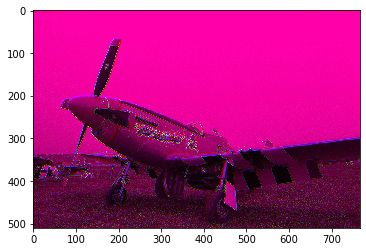

In [57]:
test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
imshow(test_many)

__Reference image for the default example:__

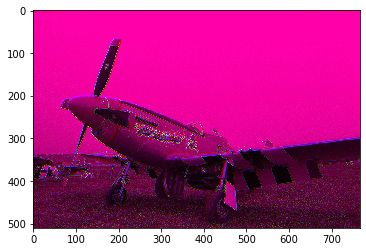

In [58]:
imshow(imload('out/many.png'))

You can save the image as usual:

In [59]:
# imsave(test_many, 'conv_many.png')

---
# Duckietown Instructions
This section explains how to play with convolutions from within duckietown.

When running `simulator.py` you can specify `--mode=vision` to enable a bunch of computer vision-related features.

For this homework, the main feature of interest is the convolution view. Pressing the `N` key cycles between applying preset convolutions (defined in `vision/preset_convs.py`) in real-time! You can drive the car around and see the world as a convolution layer does! You can also toggle grayscale display by pressing the `G` key.

Feel free to add your favorite kernels to `vision/preset_convs.py` to see them in duckietown!

## Full Vision Mode Controls Reference
- `N` - next convolution
- `G` - toggle grayscale output
- `ENTER` - save screenshot as `screen.npy` and `screen.png`
- `P` - toggle semantic segmentation output (ground truth)
- `M` - toggle map mode (different version of semantic segmentation that hides all objects and uses different colors)
- `T` - toggle top-down view

---
# Padding
The next two sections deal with some features needed for using convolutions in deep learning systems that we are currently missing. They are all very small modifications to the code we already have to make it more powerful.

The first is padding. As mentioned during lecture, the size of the feature map is less than the size of the input image. This is very inconvenient for ML system design, so we implement "padding" for our convolutions. Basically, we pretend our image is bigger than it is by extending it with zeros before doing the convolution. There are other ways to pad an image that are used in practice but they are simple enough that you can learn about them as you come across them.

Fill out the skeleton code for `conv2d_padding` in "hw.py".

In [73]:
from hw import conv2d_padding
%aimport hw

---
## Sanity Check (Padding)

The size should be exactly the same after the convolution as before the convolution:

In [123]:
test_padding = conv2d_padding(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
assert test_padding.shape == kodim20.shape

## Manual Testing (Padding)
This is pretty boring since the image is only different by a few border pixels on the border.

You might want to look at the shape though. Especially versus the output of `conv2d_many`.

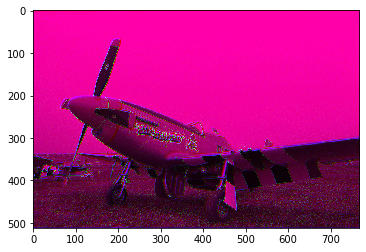

In [130]:
test_padding = conv2d_padding(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
imshow(test_padding)

In [131]:
test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
print(test_many.shape, test_padding.shape)

(510, 766, 3) (512, 768, 3)


You can save the image as usual:

In [132]:
# imsave(test_padding, 'out/padding.png')

---
# Stride
The other feature that our convolutions are missing is called "stride".

Stride is the number of pixels by which the kernel moves each time it takes a step across the image. Our current implementation can actually be said to use stride of 1, since we always move the kernel by just one pixel. In practice, sometimes we want to skip half of the valid kernel positions (use stride = 2) to "downsample" the image. This means that we force the model to remove half of the information from the image, and come up with a way to summarize it in fewer pixels. This heavily speeds up computer vision models, and is useful for putting some pressure on the network to come up with creative convolutions.

Fill out `conv2d_full` in "hw.py".

In [133]:
from hw import conv2d_full
%aimport hw

---
## Sanity check (Stride)

The output with stride = 2 should be exactly half the size off the input image (since we used padding):

In [134]:
test_stride = conv2d_full(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo], stride=2)
assert test_stride.shape == (kodim20.shape[0]//2, kodim20.shape[1]//2, 3)

## Manual Testing (Stride)
We can run this convolution version the same way as `conv2d_many`.

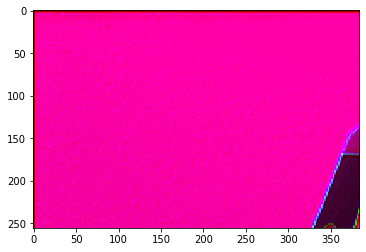

In [135]:
test_stride = conv2d_full(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo], stride=2)
imshow(test_stride)

This is pretty boring, since matplotlib resizes all images to the same dimensions, so we compare the shape of this output to the shape of the stride = 1 output:

In [136]:
test_stride1 = conv2d_full(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo], stride=1)
print(test_stride.shape, test_stride1.shape)

(256, 384, 3) (512, 768, 3)


If you save the image as a file, you can see the fact that the size is about half of a normal output yourself.

You can save the image as usual:

In [137]:
# imsave(test_stride, 'conv_full.png')

---
# Max-pooling
Max-pooling is another way of downsampling an image. Pooling is somewhat controversial but it appears so often in practice that you should really know about it.

In [138]:
from hw import maxpool2d
%aimport hw

---
## Sanity Check (Max-pooling)
Check that the maxpool output is exactly one third of the input:

In [147]:
test_maxpool = maxpool2d(kodim20)
print(test_maxpool.shape, (kodim20.shape[0]//3, kodim20.shape[1]//3))
assert test_maxpool.shape == (kodim20.shape[0]//3, kodim20.shape[1]//3)

1
1
(512, 768, 3)
514
770
(256, 171) (170, 256)


AssertionError: 

## Manual Testing (Max-pooling)

Max-pooled images look very interesting, but the change is only very obvious if you use a large pooling window.

Try setting size = 11 (and stride = 11) as an example.

Keeping stride and size equal is generally a good idea for some information theory reasons (since otherwise the pooling windows overlap).

Note: size must be odd for padding to work correctly, because we pad both sides the same amount. Real ML frameworks just stick the extra padding on some pre-determined side of the image.

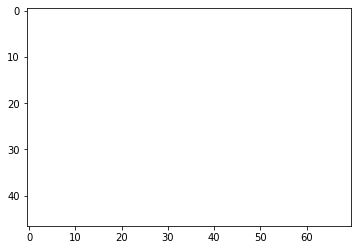

In [141]:
test_maxpool = maxpool2d(kodim20, size=11, stride=11)
imshow_grayscale(test_maxpool)

If you save the image as a file, you can see that it is a lot smaller than the input.

You can save the image as usual:

In [53]:
# imsave_grayscale(test_maxpool, 'maxpool.png')

In [ ]:
test_maxpool = maxpool2d(kodim20,size=5,stride=5)
print(test_maxpool.shape, kodim20.shape)
assert test_maxpool.shape == (kodim20.shape[0]//5, kodim20.shape[1]//5)

---
# Summary Test

In [ ]:
# Grayscale
test_grayscale_size = conv2d_grayscale(kodim20_grayscale, kernel_emboss)
assert test_grayscale_size.shape == (kodim20_grayscale.shape[0]-2, kodim20_grayscale.shape[1]-2)

test_grayscale_size = conv2d_grayscale(kodim20_grayscale, kernel_gauss5)
assert test_grayscale_size.shape == (kodim20_grayscale.shape[0]-4, kodim20_grayscale.shape[1]-4)

kernel_test_aspect = np.array([
    [-1.,  1.,  0., -1.,  1.],
    [ 1.,  0.,  0.,  0., -1.],
    [-1., -1.,  0.,  1.,  1.]
])
test_grayscale_aspect = conv2d_grayscale(kodim20_grayscale, kernel_test_aspect)
assert test_grayscale_aspect.shape == (kodim20_grayscale.shape[0]-2, kodim20_grayscale.shape[1]-4)

# Color
test_size = conv2d(kodim20, stacked_combo)
assert test_size.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2)

test_size = conv2d(kodim20, stack_kernel(kernel_gauss5))
assert test_size.shape == (kodim20.shape[0]-4, kodim20.shape[1]-4)

kernel_test_aspect = np.array([
    [-1.,  1.,  0., -1.,  1.],
    [ 1.,  0.,  0.,  0., -1.],
    [-1., -1.,  0.,  1.,  1.]
])
test_aspect = conv2d(kodim20, stack_kernel(kernel_test_aspect))
assert test_aspect.shape == (kodim20.shape[0]-2, kodim20.shape[1]-4)

# Many
test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
assert(test_many.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2, 3))

test_many = conv2d_many(kodim20, [stack_kernel(kernel_gauss3), stacked_combo])
assert(test_many.shape == (kodim20.shape[0]-2, kodim20.shape[1]-2, 2))

# Padding
test_padding = conv2d_padding(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo])
assert test_padding.shape == kodim20.shape

# Stride
test_stride = conv2d_full(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo], stride=2)
assert test_stride.shape == (kodim20.shape[0]//2, kodim20.shape[1]//2, 3)

# Maxpool
test_maxpool = maxpool2d(kodim20)
assert test_maxpool.shape == (kodim20.shape[0]//3, kodim20.shape[1]//3)

print('Sanity checks passed! Now run the 2 cells below!!!')

In [ ]:
# Combined
test_combined = conv2d_full(kodim20, [stack_kernel(kernel_gauss3), stack_kernel(kernel_laplace), stacked_combo], stride=3)
test_combined = maxpool2d(test_combined, size=5, stride=5)
test_combined = conv2d_grayscale(test_combined, kernel_laplace)

In [ ]:
correct_out = imload_grayscale('out/combined.png')

imshow_grayscale(test_combined)
imshow_grayscale(correct_out)

imshow_grayscale(correct_out - test_combined.clip(0, 1))

err = correct_out - test_combined.clip(0, 1)
mse = np.sum(err * err)
print(mse)

assert mse < .01

print('All good! You are ready for checkoff!')

---
# Pro Tips
## Edge Detection & Blur
if using any of the "edge detection" kernels (`lsobel`, `lscharr`, `lprewitt`, `laplace`), you might get better results by first blurring the image with e.g. `gauss5`.

Example:
```python
test_grayscale = conv2d_grayscale(kodim20_grayscale, kernel_gauss5)
test_grayscale = conv2d_grayscale(test_grayscale, kernel_lsobel)
imshow_grayscale(test_grayscale)
```


## Custom kernels
if you invent a kernel and the image is too bright or too dark (or completely white or black), make sure all the numbers in the kernel sum up to 1, otherwise it will make the image darker or brighter by some amount.